# Example 6
## Load toy Datasets and do some basic statistics
Lets try the cancer toy-dataset from scikit-learn. 

In [15]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [16]:
from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
from pprint import pprint
import matplotlib.pyplot as plt
import math

In [17]:
df = load_breast_cancer(as_frame=True)
df_colms = df.keys()
print(df_colms)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [18]:
data = df.data
target = df.target
targetNames = df.target_names
features = df.feature_names
DESCR = df.DESCR
dataModule = df.data_module
filename = df.filename
frame = df.frame

In [19]:
frame.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

# The Middle

* Mean: Average $\mu = \sum_{i}^{n} \frac{x_{i}}{n}$
* Median: Middle. There are the same number of records before and after.
* Mode(s): Most common value(s).

In [20]:
print(f'{("Feature" + " "*30)[:31]} Mean   Sum/Size   Median      Mode(s)')
for feature in features:
    colm = data[feature]
    mode = '(' + str(colm.mode())
    mode = mode.replace('\nName', '  Name')[:mode.find("\nName")]
    mode = mode.replace('\n', ') , (') + ')'
    print(f'{(feature+" "*30)[:29]}', end=' | ')
    print(f' {round(colm.mean(), 1)}', end='  | ')
    print(f' {round(colm.sum()/colm.size, 1)}', end='   | ')
    print(f' {round(colm.median(), 1)}', end='     | ')
    print(f' {mode}')

Feature                         Mean   Sum/Size   Median      Mode(s)
mean radius                   |  14.1  |  14.1   |  13.4     |  (0    12.34)
mean texture                  |  19.3  |  19.3   |  18.8     |  (0    14.93) , (1    15.70) , (2    16.84) , (3    16.85) , (4    17.46) , (5    18.22) , (6    18.90) , (7    19.83) , (8    20.52)
mean perimeter                |  92.0  |  92.0   |  86.2     |  (0     82.61) , (1     87.76) , (2    134.70)
mean area                     |  654.9  |  654.9   |  551.1     |  (0    512.2)
mean smoothness               |  0.1  |  0.1   |  0.1     |  (0    0.1007)
mean compactness              |  0.1  |  0.1   |  0.1     |  (0    0.1147) , (1    0.1206)
mean concavity                |  0.1  |  0.1   |  0.1     |  (0    0.0)
mean concave points           |  0.0  |  0.0   |  0.0     |  (0    0.0)
mean symmetry                 |  0.2  |  0.2   |  0.2     |  (0    0.1601) , (1    0.1714) , (2    0.1717) , (3    0.1769) , (4    0.1893)
mean fractal dime

# Variability:

* Range

In [21]:
for feature in features:
    colm = data[feature]
    print(f'{feature}', end=' ')
    print(f'Range: [{colm.min()},{colm.max()}]')

mean radius Range: [6.981,28.11]
mean texture Range: [9.71,39.28]
mean perimeter Range: [43.79,188.5]
mean area Range: [143.5,2501.0]
mean smoothness Range: [0.05263,0.1634]
mean compactness Range: [0.01938,0.3454]
mean concavity Range: [0.0,0.4268]
mean concave points Range: [0.0,0.2012]
mean symmetry Range: [0.106,0.304]
mean fractal dimension Range: [0.04996,0.09744]
radius error Range: [0.1115,2.873]
texture error Range: [0.3602,4.885]
perimeter error Range: [0.757,21.98]
area error Range: [6.802,542.2]
smoothness error Range: [0.001713,0.03113]
compactness error Range: [0.002252,0.1354]
concavity error Range: [0.0,0.396]
concave points error Range: [0.0,0.05279]
symmetry error Range: [0.007882,0.07895]
fractal dimension error Range: [0.0008948,0.02984]
worst radius Range: [7.93,36.04]
worst texture Range: [12.02,49.54]
worst perimeter Range: [50.41,251.2]
worst area Range: [185.2,4254.0]
worst smoothness Range: [0.07117,0.2226]
worst compactness Range: [0.02729,1.058]
worst concav

* Standard Deviation: $\sigma = \sqrt{\sum_{i}^{n}{\dfrac{(x_{i}-\mu)^{2}}{n-1}}}$

In [22]:
for feature in features:
    colm = data[feature]
    print(f'{feature}', end=' ')
    print(f'SD: {round(colm.std(),2)}')
    

mean radius SD: 3.52
mean texture SD: 4.3
mean perimeter SD: 24.3
mean area SD: 351.91
mean smoothness SD: 0.01
mean compactness SD: 0.05
mean concavity SD: 0.08
mean concave points SD: 0.04
mean symmetry SD: 0.03
mean fractal dimension SD: 0.01
radius error SD: 0.28
texture error SD: 0.55
perimeter error SD: 2.02
area error SD: 45.49
smoothness error SD: 0.0
compactness error SD: 0.02
concavity error SD: 0.03
concave points error SD: 0.01
symmetry error SD: 0.01
fractal dimension error SD: 0.0
worst radius SD: 4.83
worst texture SD: 6.15
worst perimeter SD: 33.6
worst area SD: 569.36
worst smoothness SD: 0.02
worst compactness SD: 0.16
worst concavity SD: 0.21
worst concave points SD: 0.07
worst symmetry SD: 0.06
worst fractal dimension SD: 0.02


* Draw Histograms of Features to better understand data

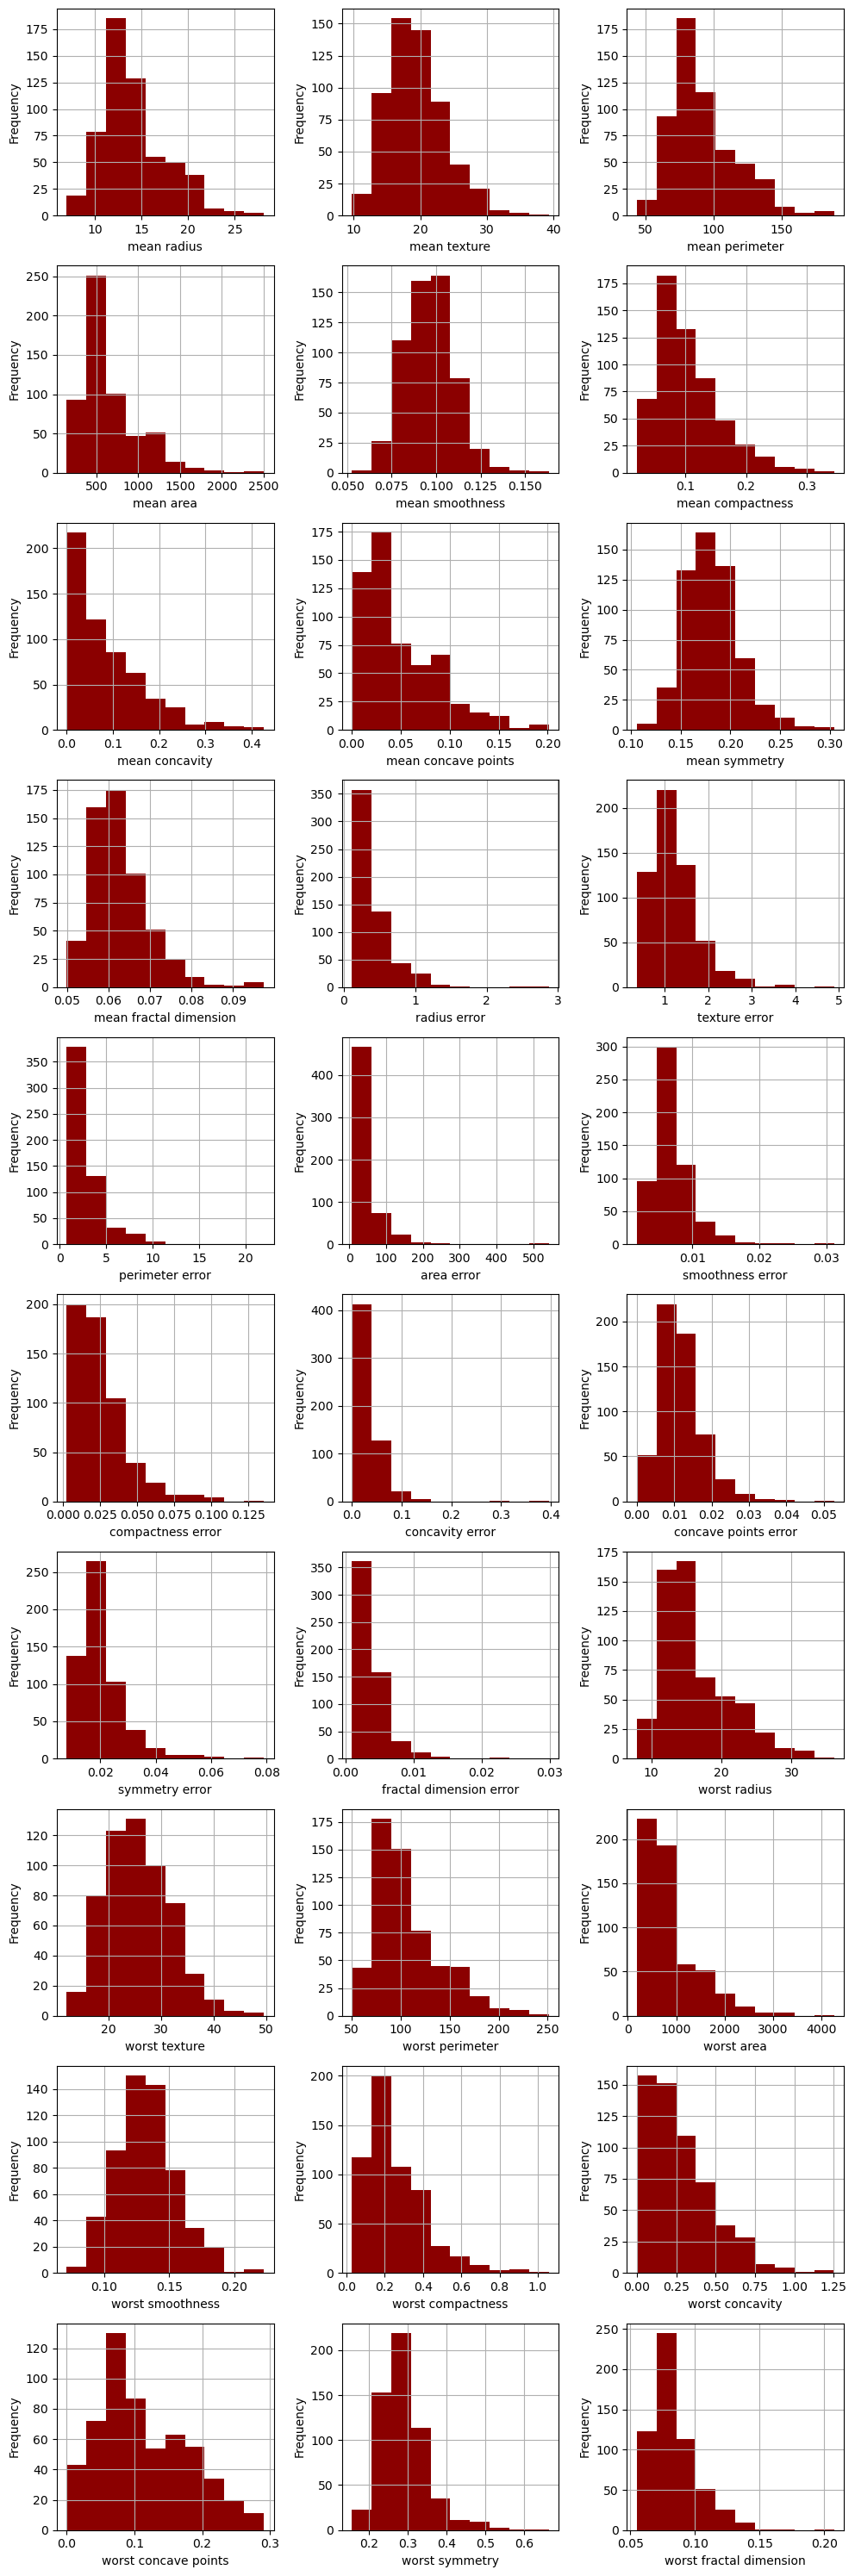

In [23]:
h =[]
nfeatures = len(features)
f = plt.figure(figsize=(10,nfeatures))
for nth_feat, feature in enumerate(features):
    plt.subplot(int(nfeatures/3), 3, nth_feat+1)
    colm = data[feature]
    hsub = h.append(colm.hist(color='darkRed'))
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
plt.close()

* Draw scatter plots of featurees to see correlations.
Here there are many correlations, so kept half to speed things along.

<Figure size 6000x6000 with 0 Axes>

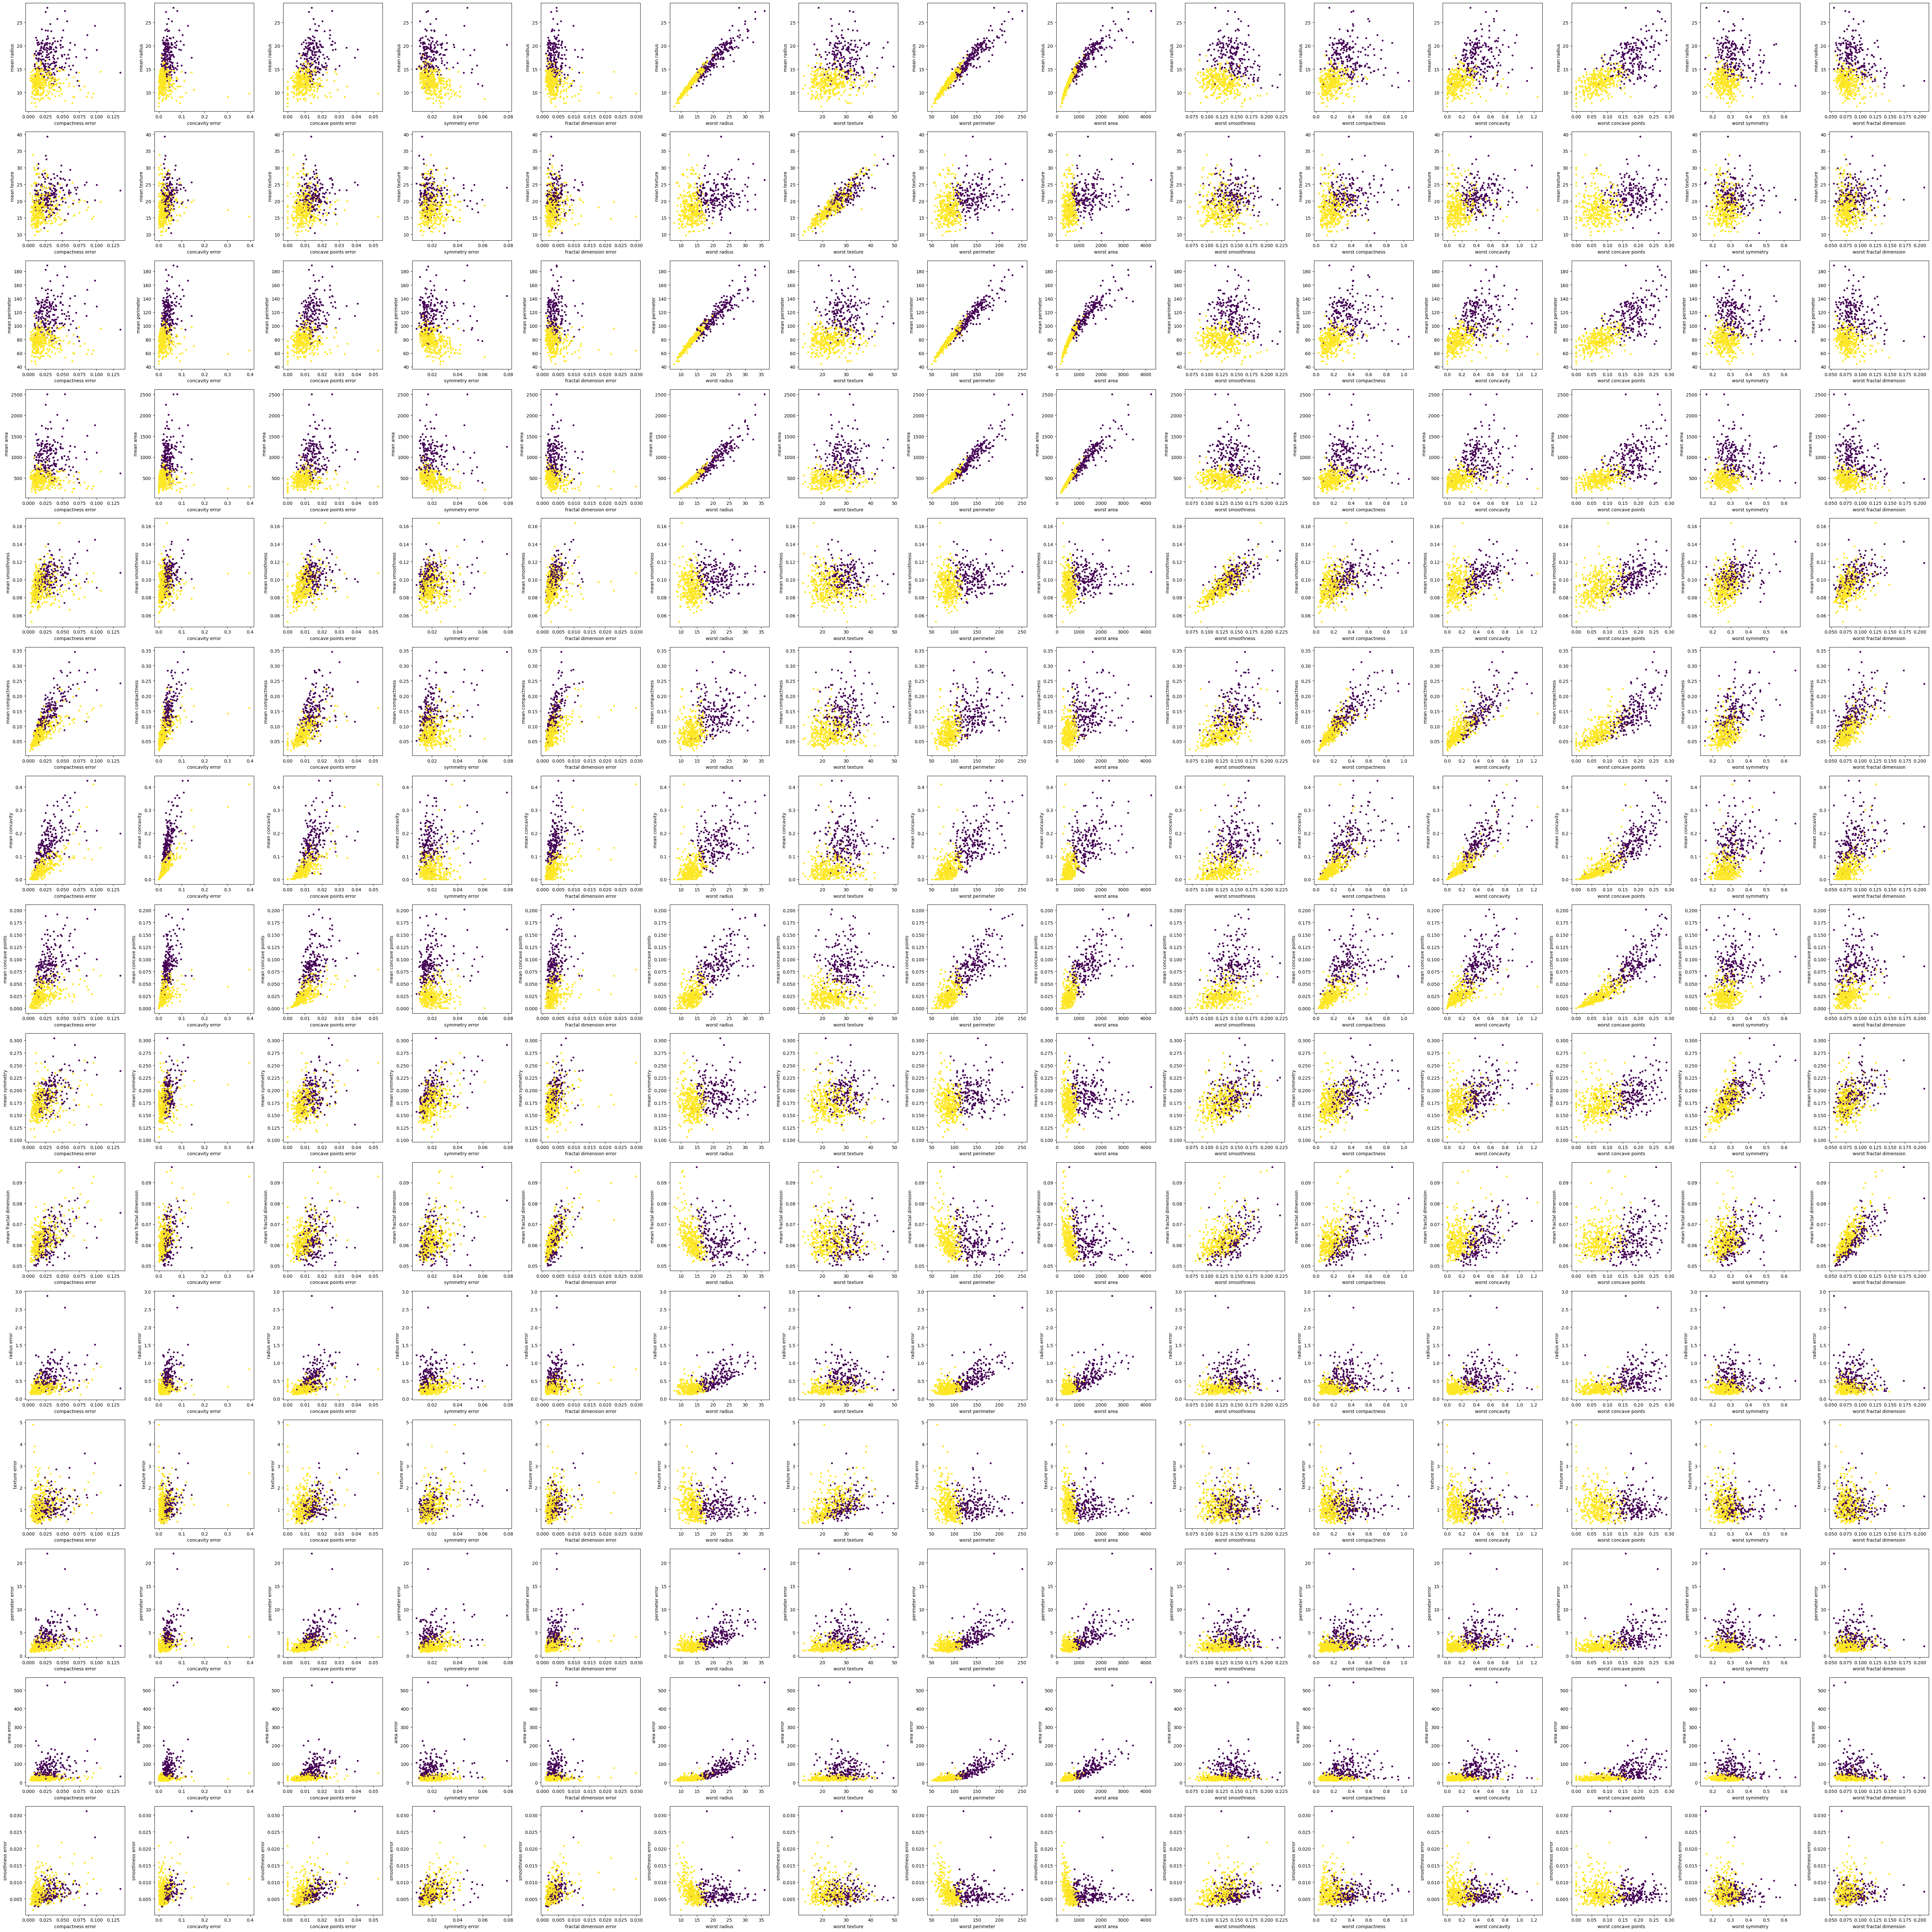

In [30]:
f = plt.figure(figsize=(2*nfeatures,2*nfeatures))
f, axes = plt.subplots(int(nfeatures/2), int(nfeatures/2), figsize=(2*nfeatures,2*nfeatures))
for nth_featVert, featureVert in enumerate(features[:int(nfeatures/2)]):
    for nth_feat, feature in enumerate(features[int(nfeatures/2):]):
        axes[nth_featVert][nth_feat].scatter(x=frame[feature], y=frame[featureVert], c=frame["target"], s=10)
        axes[nth_featVert][nth_feat].set_xlabel(feature)
        axes[nth_featVert][nth_feat].set_ylabel(featureVert)
plt.tight_layout()
plt.show()
plt.close()